<h1> Smart Bridge Assignment - 2</h1><br>
<h1>Name: Kuchibhatla Mohan Datta</h1><br>
<h1>Reg_No : 20MID0012</h1><br>


<h3> Build an ANN model for Drug classification.
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information,
including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to
develop a model that can accurately predict the class or category of a given drug based on its features.
Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification</h3>

In [32]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Read the dataset and do data pre-processing

In [33]:
df = pd.read_csv('/content/drug200.csv') #Reading the data
print(df.head(),df.tail())
df.info()

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY      Age Sex      BP Cholesterol  Na_to_K   Drug
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-

In [34]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [35]:
#Checking for null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<Axes: >

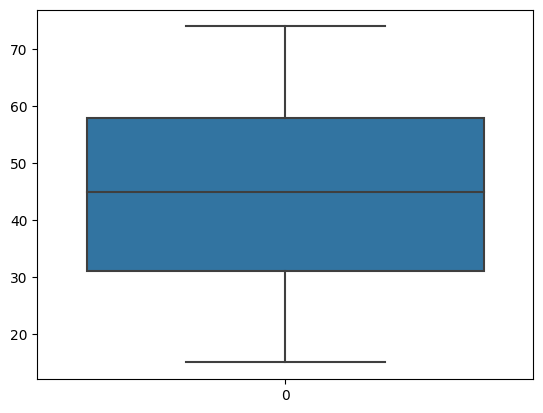

In [36]:
sns.boxplot(df['Age'])# no outliers


<Axes: >

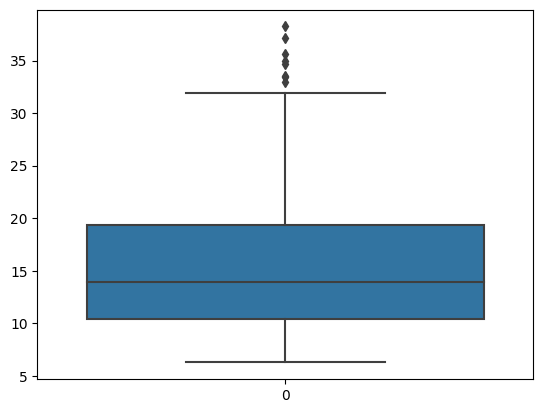

In [37]:
sns.boxplot(df['Na_to_K'])# contains outliers

In [38]:
# Na_to_K contains outliers
# Replacing outliers with medians
q1 = df.Na_to_K.quantile(0.25)
q3 = df.Na_to_K.quantile(0.75)

IQR = q3-q1
print('IQR is:\t',IQR)

UpperLimit = q3 + 1.5*IQR
print('Upper Limit is:\t',UpperLimit)




IQR is:	 8.9345
Upper Limit is:	 32.78175


In [39]:
print(df['Na_to_K'].median())

13.9365


In [40]:
df['Na_to_K'] = np.where(df['Na_to_K']>UpperLimit,13.9365,df['Na_to_K'])

<Axes: >

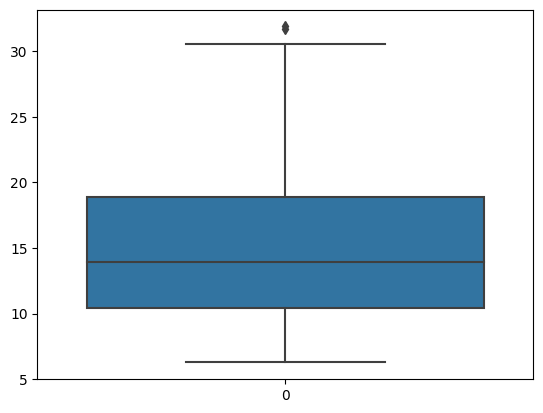

In [41]:
sns.boxplot(df['Na_to_K'])# Still contain outlier

In [42]:
# Na_to_K contains outliers

q1 = df.Na_to_K.quantile(0.25)
q3 = df.Na_to_K.quantile(0.75)

IQR = q3-q1
print('IQR is:\t',IQR)

UpperLimit = q3 + 1.5*IQR
print('Upper Limit is:\t',UpperLimit)
print(df['Na_to_K'].median())

IQR is:	 8.409000000000002
Upper Limit is:	 31.468000000000004
13.93575


In [43]:
df['Na_to_K'] = np.where(df['Na_to_K']>UpperLimit,13.93575,df['Na_to_K'])

<Axes: >

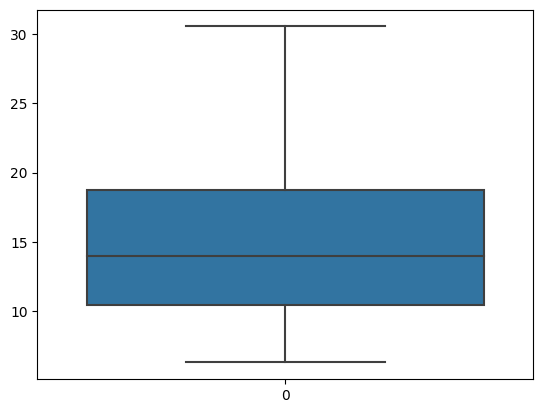

In [44]:
sns.boxplot(df['Na_to_K'])# Outlier handled successfully

In [45]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler #library used for Encoding

le = LabelEncoder()  #initialize the lib
# Convert categorical features to numerical labels

df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

# Scale the numerical features
scaler = MinMaxScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

In [46]:
# Splitting the data
#x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
x=df.drop(columns = ['Drug'],axis=1)
y = df['Drug']
y[0:5]

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=21)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
xtrain.head(),ytrain.head(),xtest.head(),ytest.head()

(160, 5) (40, 5) (160,) (40,)


(          Age  Sex  BP  Cholesterol   Na_to_K
 176  0.559322    1   0            1  0.171900
 111  0.542373    0   2            1  0.017038
 114  0.084746    0   2            1  0.123956
 14   0.593220    0   2            0  0.264785
 106  0.118644    1   2            0  0.233919,
 176    1
 111    4
 114    4
 14     4
 106    4
 Name: Drug, dtype: int64,
           Age  Sex  BP  Cholesterol   Na_to_K
 144  0.406780    1   0            0  0.139718
 9    0.474576    1   1            1  0.539076
 17   0.474576    1   0            0  0.317009
 20   0.711864    1   1            1  0.529199
 45   0.864407    0   2            1  0.075641,
 144    1
 9      0
 17     1
 20     0
 45     4
 Name: Drug, dtype: int64)

# Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [48]:
# ANN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_dim=5,activation = 'relu')) #Adding Input layer with 4 neurons since we have 4 columns 
model.add(Dense(32,activation = 'relu')) #Adding 1st Hidden Layer with 32 neurons
model.add(Dense(26,activation = 'relu')) #Adding 2nd Hidden Layer with 26 neurons
model.add(Dense(18,activation = 'relu')) #Adding 3rd Hidden Layer with 18 neurons
model.add(Dense(12,activation = 'relu')) #Adding 4th Hidden Layer with 12 neurons

# Here it is multi class classification we softmax, if binary we use sigmoid
model.add(Dense(5,activation = 'softmax'))  #Adding Ouput layer with 3 since we have 3 types of species

In [49]:
# Here if it is softmax we use categorical_crossentropy and if it is sigmoid means we use binary_crossentropy

# we mentioned metrics as accuracy so accuracy will also be printed at the time of output
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                384       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 26)                858       
                                                                 
 dense_8 (Dense)             (None, 18)                486       
                                                                 
 dense_9 (Dense)             (None, 12)                228       
                                                                 
 dense_10 (Dense)            (None, 5)                 65        
                                                                 
Total params: 4,101
Trainable params: 4,101
Non-traina

In [53]:
model.fit(xtrain, ytrain, epochs=56, batch_size=20,validation_data=(xtest, ytest))

Epoch 1/56
8/8 [==============================] - 0s 12ms/step - loss: 0.1844 - accuracy: 0.9312 - val_loss: 0.3470 - val_accuracy: 0.8250
Epoch 2/56
8/8 [==============================] - 0s 8ms/step - loss: 0.1943 - accuracy: 0.9125 - val_loss: 0.4093 - val_accuracy: 0.8000
Epoch 3/56
8/8 [==============================] - 0s 6ms/step - loss: 0.1791 - accuracy: 0.9125 - val_loss: 0.3207 - val_accuracy: 0.8000
Epoch 4/56
8/8 [==============================] - 0s 7ms/step - loss: 0.1783 - accuracy: 0.9187 - val_loss: 0.4518 - val_accuracy: 0.8000
Epoch 5/56
8/8 [==============================] - 0s 6ms/step - loss: 0.1849 - accuracy: 0.9187 - val_loss: 0.3599 - val_accuracy: 0.8000
Epoch 6/56
8/8 [==============================] - 0s 6ms/step - loss: 0.1710 - accuracy: 0.9375 - val_loss: 0.3628 - val_accuracy: 0.8000
Epoch 7/56
8/8 [==============================] - 0s 6ms/step - loss: 0.1834 - accuracy: 0.9187 - val_loss: 0.3430 - val_accuracy: 0.8500
Epoch 8/56
8/8 [=================

In [54]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,0,0,0,0.785464
1,0.542373,1,1,0,0.280835
2,0.542373,1,1,0,0.158237
3,0.220339,0,2,0,0.062924
4,0.779661,0,1,0,0.484547


# Task 3: Test the model with random data

In [55]:
#here while predicting we should consider transformed values rather than orginal values
ypred = model.predict([[0.87,1,1,1,0.8249]])
print(ypred)

1/1 [==============================] - 0s 97ms/step
[[1.0000000e+00 1.9125792e-15 1.7526185e-16 1.1560463e-12 9.9391274e-13]]


In [56]:
ypred = np.argmax(ypred)
ypred

0

In [57]:
output = ['DrugY','drugX','drugA','drugC','drugB']
output[ypred]

'DrugY'

In [58]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 11ms/step - loss: 0.2022 - accuracy: 0.9000
Test accuracy: 89.99999761581421
